---
## Comparaison BertKMeans et BertTopics

----

Traits principaux : 
*

**


In [1]:
import pandas as pd
import numpy as np
#import nltk 
#nltk.download('punkt') 
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#from nltk.tokenize import PunktSentenceTokenizer, word_tokenize


import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)


#df = pd.read_excel(r'DATASETS\df_50_3000_km_9_30.xlsx',index_col=0)
#len(df)

In [2]:
df=pd.read_excel(r'D:\Documents\DATA_SCIENCE\DATASCIENTEST_juin_2024\PROJET\Huggingface\jun24_bc_llm\Panier_a_linge\DATASETS\DF_BertEmbed_Kmeans_Berttopic_9_100.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64121 entries, 0 to 64120
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             64121 non-null  object
 1   sign_count       64121 non-null  int64 
 2   record           64121 non-null  int64 
 3   id_102661        64121 non-null  int64 
 4   id_50_3000       64121 non-null  int64 
 5   km_labels15      64121 non-null  int64 
 6   km_labels20      64121 non-null  int64 
 7   km_labels25      64121 non-null  int64 
 8   km_labels30      64121 non-null  int64 
 9   km_labels45      64121 non-null  int64 
 10  BertEmbeddings   64121 non-null  object
 11  BertTopics_26    64121 non-null  int64 
 12  BertTopics_Name  64121 non-null  object
 13  BertTopics_48    64121 non-null  int64 
 14  km_labels100     64121 non-null  int64 
 15  BertTopics_100   64121 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 7.8+ MB


In [4]:
#charger embeddings BERT déjà entrainés dans le notebook 09
#--------------------------------------------------------------------------------

doc_emb = np.load('D:\Documents\DATA_SCIENCE\DATASCIENTEST_juin_2024\PROJET\Huggingface\jun24_bc_llm\Panier_a_linge\document_embeddings_bert_64121.npy')

In [4]:

#list_doc_emb = doc_emb.tolist()
#df.loc[:,'BertEmbeddings'] = ""
#df['BertEmbeddings'] = list(doc_emb)

In [5]:
df.head(1)

text  sign_count  record  \
0  Local Charlotte, NC news station WSOCTV is rep...        2302   34366   

   id_102661  id_50_3000  km_labels15  km_labels20  km_labels25  km_labels30  \
0          0           0            5            0            4           15   

   km_labels45                                     BertEmbeddings  \
0           10  [-4.66352329e-02  4.57432196e-02 -1.13387138e-...   

   BertTopics_26                    BertTopics_Name  BertTopics_48  \
0              1  1_racism_racist_antifa_protesters             10   

   km_labels100  BertTopics_100  
0            50              36

In [16]:

from IPython.display import display, HTML
def pretty_print(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

#pretty_print(df_for_preclass_samples_45[['text', 'top_keywords_list']][3030:3031])

In [23]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',100)
#pretty_print(df[['text']][df['km_labels25']==17])

# Comparaison classification et atrribution entre BERTopic et Kmeans

In [9]:
xtab_BT26_KM30 = pd.crosstab(df.km_labels25,df.BertTopics_26, margins = True)
xtab_BT26_KM30

BertTopics_26     -1      0     1     2     3     4     5     6     7     8  \
km_labels25                                                                   
0                563     29     1     4    11     0     2     4     1     1   
1                 42     48     0     0     1     1  1097     2     7     1   
2                946     24   118    27     0     5     3     9    25     0   
3                 43   4381     1     0     0     0     0     0     1     0   
4               1022     86  1359     7     3    30    19    33     0     4   
5                763     21    12     1     4     7     5     1  1098     0   
6                577   4674    39     5    12    17   123   110     5     9   
7                 18   3925     2     0     0     0     2     2     1     0   
8                357    143     4     1    60     1    29  1080     0     4   
9                  4    939     0     0     0     0     0     0     0     0   
10               693      2     3  1558     1    77     1     0     0     1   
11                 0   2690     0     0     0     0     0     0     0     0   
12                34   3122     4     0     0     0    34     2     2     0   
13              1492     33    86    55     3   533     1    13     8     0   
14                 5   2300     0     0     0     1     0     0     0     0   
15               533     36     0     9    55     0     7     1     0   957   
16              1074     36     3     5   850     1     1     5     0     1   
17              2445     44   370    27     0   750     8     4    11     5   
18              1564     13    31     6     8    28     2     2    16     0   
19                 1   1422     0     0     0     0     0     0     0     0   
20              1337     42     5     5   508     0     5    15     0    22   
21                 3   1352     1     0     0     0     0     0     0     0   
22                19   3336     0     0     0     0     3     0     1     0   
23              1789     54     5    12     3     6     9     0    30    36   
24                 9   2433     0     0     1     0     0     1     2     0   
All            15333  31185  2044  1722  1520  1457  1351  1284  1208  1041   

BertTopics_26  ...   16   17   18   19   20   21   22   23   24    All  
km_labels25    ...                                                      
0              ...    3    0    3   15    5    1  187    0    1   1694  
1              ...    0    0    0    0    0    0    1    0    0   1201  
2              ...    1    0   77    1    1  155    0   35    0   2171  
3              ...    0    0    0    0    0    0    0    0    0   4427  
4              ...    1    0    0    1   87    1    3    0    1   2833  
5              ...   14    1   90    1    0   10    0    4    0   2146  
6              ...    1    1    0    0   18    0    0    1    1   5632  
7              ...    1    0    0    0    0    0    0    0    0   3953  
8              ...    0    0    0    2   14    0    1    0   98   1803  
9              ...    0    0    0    0    0    0    0    0    0    943  
10             ...    0    4    8    0    0    5    0   32    0   2432  
11             ...    0    0    0    0    0    0    0    0    0   2690  
12             ...    0    0    0    0    0    0    0    0    0   3213  
13             ...    0    5    2    1    0    9    0   14    0   2330  
14             ...    0    0    0    0    0    0    0    0    0   2306  
15             ...    5    0    0   27    1    0    0    0   18   2120  
16             ...    0    0    0  169   40    0    0    0    8   2306  
17             ...    0   19    0    6    0    2    0   73    0   3891  
18             ...   33  342   15    3    0   73    0   27    0   2350  
19             ...    0    0    0    0    0    0    0    0    0   1423  
20             ...  295    0    2    1  119    0   53    0   76   2530  
21             ...    0    0    0    0    0    0    0    0    0   1356  
22             ...    0    0    0  

Text(158.22222222222223, 0.5, 'Bert sentence Transormer + Kmeans')

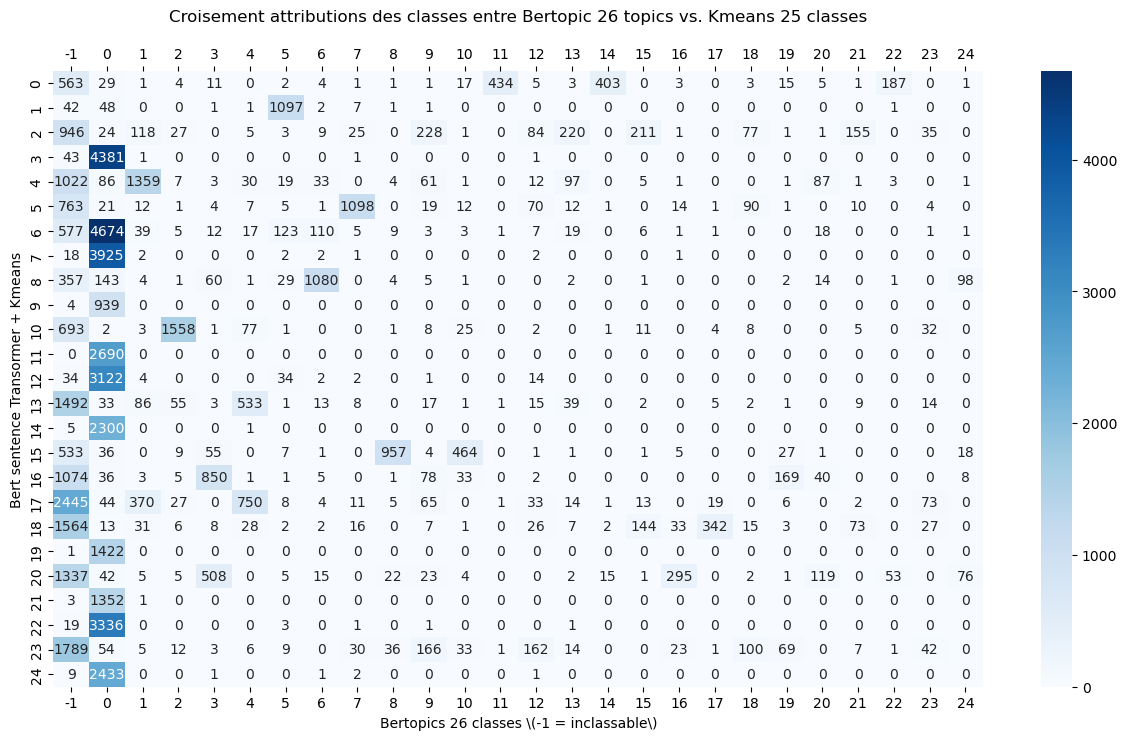

In [8]:
plt.figure(figsize = (15,8) )
sns.heatmap(xtab_BT26_KM30, annot = True, fmt=".0f", annot_kws={"size": 10}, cmap="Blues")
plt.tick_params(axis='x', top=True, labeltop=True)
plt.title('Croisement attributions des classes entre Bertopic 26 topics vs. Kmeans 25 classes\n')
plt.xlabel('Bertopics 26 classes \(-1 = inclassable\)')
plt.ylabel('Bert sentence Transormer + Kmeans')
# or fmt="d" for integers


# Évaluations 1 : UMAP

In [10]:
import umap 
 

In [11]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.2, n_components=2, random_state=42)

In [12]:
umap_embeddings_2d = reducer.fit_transform(doc_emb)

c:\Users\wf\anaconda3\envs\AUG24\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


C:\Users\wf\AppData\Local\Temp\ipykernel_6768\1196474574.py:12: UserWarning: The palette list has more values (100) than needed (25), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels25'], palette=palette, s=50, ax=axes[0], legend = False)
C:\Users\wf\AppData\Local\Temp\ipykernel_6768\1196474574.py:17: UserWarning: The palette list has more values (100) than needed (45), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels45'], palette=palette, s=50, ax=axes[1], legend = False)


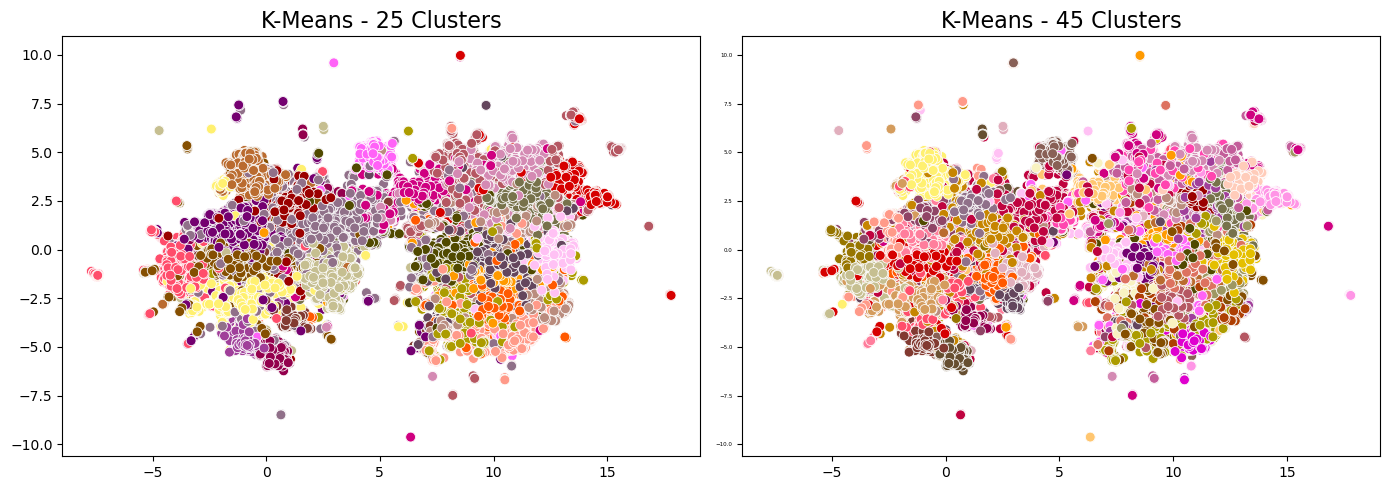

In [40]:
# 25 labels kmeans - 45 labels kmeans
# -----------------------------------------
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(12,4))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First scatter plot (for km_labels25)
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels25'], palette=palette, s=50, ax=axes[0], legend = False)
axes[0].set_title('K-Means - 25 Clusters', fontsize = 16)
axes[1].tick_params(axis='y', labelsize=4)

# Second scatter plot (for km_labels45)
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels45'], palette=palette, s=50, ax=axes[1], legend = False)
axes[1].set_title('K-Means - 45 Clusters', fontsize = 16)
axes[1].tick_params(axis='y', labelsize=4)

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0)

plt.tight_layout()


# Show the plots
plt.show()




C:\Users\wf\AppData\Local\Temp\ipykernel_6768\525510950.py:12: UserWarning: The palette list has more values (100) than needed (26), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_26'], palette=palette, s=50, ax=axes[0], legend = False)
C:\Users\wf\AppData\Local\Temp\ipykernel_6768\525510950.py:17: UserWarning: The palette list has more values (100) than needed (49), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_48'], palette=palette, s=50, ax=axes[1], legend = False)


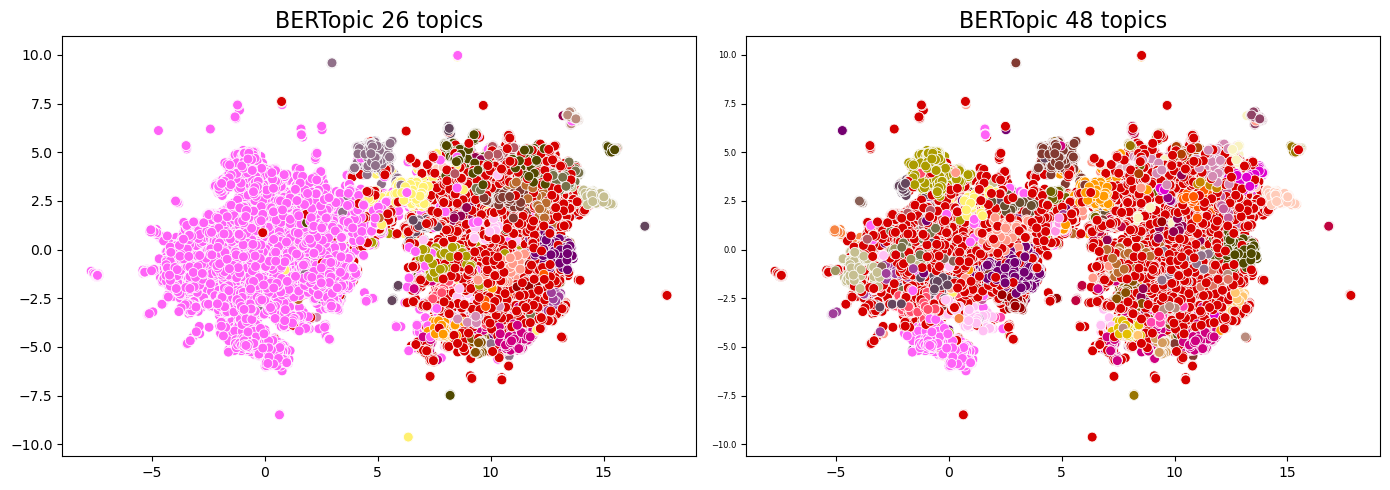

In [38]:
# 26 BERTopic - 48 BERTopic
# -----------------------------------------
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(12,4))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter 26
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_26'], palette=palette, s=50, ax=axes[0], legend = False)
axes[0].set_title('BERTopic 26 topics', fontsize = 16)
axes[1].tick_params(axis='y', labelsize=6)

# Scatter 48
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_48'], palette=palette, s=50, ax=axes[1], legend = False)
axes[1].set_title('BERTopic 48 topics', fontsize = 16)
axes[1].tick_params(axis='y', labelsize=6)

 
plt.subplots_adjust(wspace=0)

plt.tight_layout()

plt.show()



C:\Users\wf\AppData\Local\Temp\ipykernel_6768\3406660925.py:17: UserWarning: 
The palette list has fewer values (100) than needed (101) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_100'], palette=palette, s=50, ax=axes[1], legend = False)


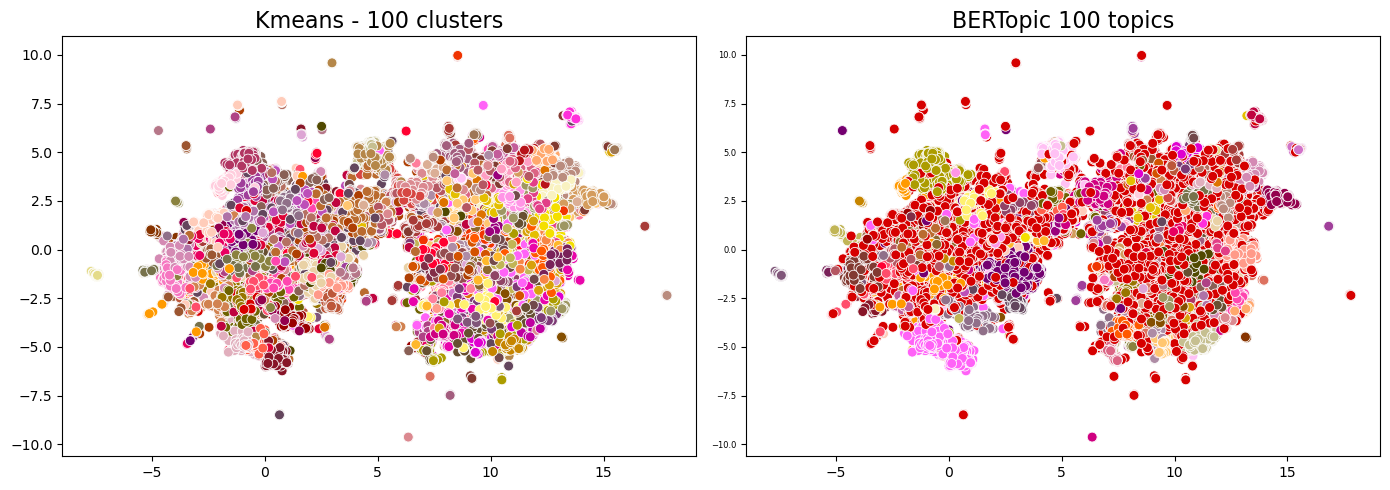

In [39]:
# 100 Kmeans - 100 BERTopic
# -----------------------------------------
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(12,4))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter 100 kmeans
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels100'], palette=palette, s=50, ax=axes[0], legend = False)
axes[0].set_title('Kmeans - 100 clusters', fontsize = 16)
axes[1].tick_params(axis='y', labelsize=6)

# Scatter 100 Bertopc
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_100'], palette=palette, s=50, ax=axes[1], legend = False)
axes[1].set_title('BERTopic 100 topics', fontsize = 16)
axes[1].tick_params(axis='y', labelsize=6)


plt.subplots_adjust(wspace=0)

plt.tight_layout()

plt.show()



C:\Users\wf\AppData\Local\Temp\ipykernel_14972\1354899641.py:10: UserWarning: The palette list has more values (100) than needed (30), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels30'],


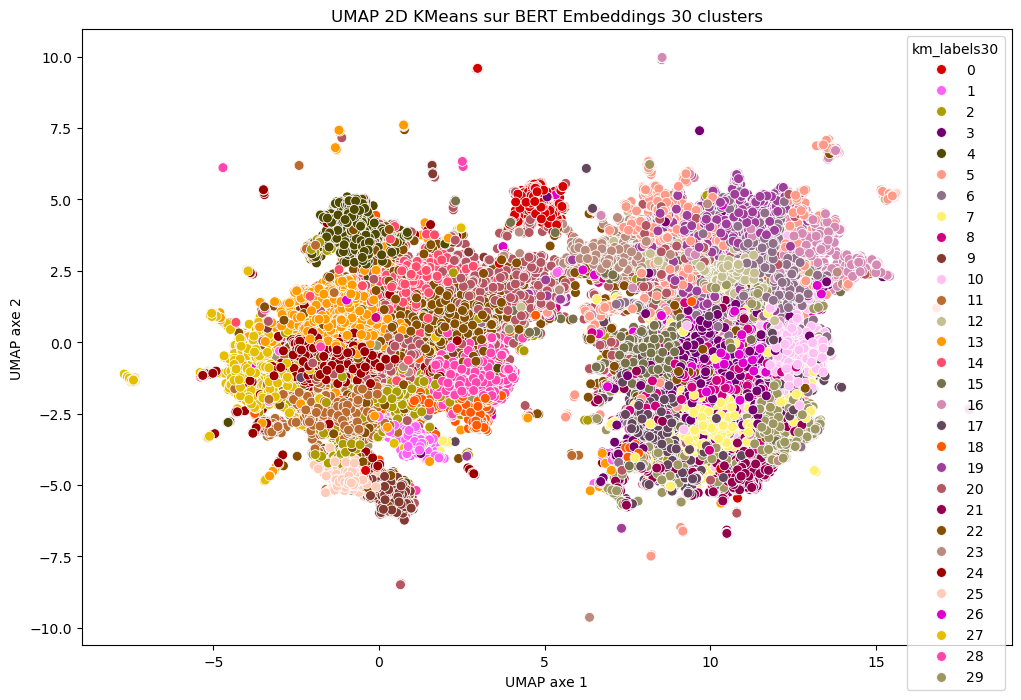

In [33]:
# 30 labels kmeans
# -----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

#sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], style = df['km_labels30'], hue=df['km_labels30'], 
sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels30'], palette=palette, s=50)
#sns.relplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels15'], palette="Spectral", s=50)

#handles, labels = scatter.get_legend_handles_labels()
#scatter.legend(handles=handles, labels=range(0,14), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adjust fontsize here

plt.title('UMAP 2D KMeans sur BERT Embeddings 30 clusters')
#plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper right', fontsize='small', title_fontsize='small')
plt.xlabel('UMAP axe 1')
#plt.xlim(-2,16)
plt.ylabel('UMAP axe 2')
#plt.ylim(4,15)
plt.show()

C:\Users\wf\AppData\Local\Temp\ipykernel_14972\3329129620.py:9: UserWarning: The palette list has more values (100) than needed (45), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels45'], palette=palette, s=50)


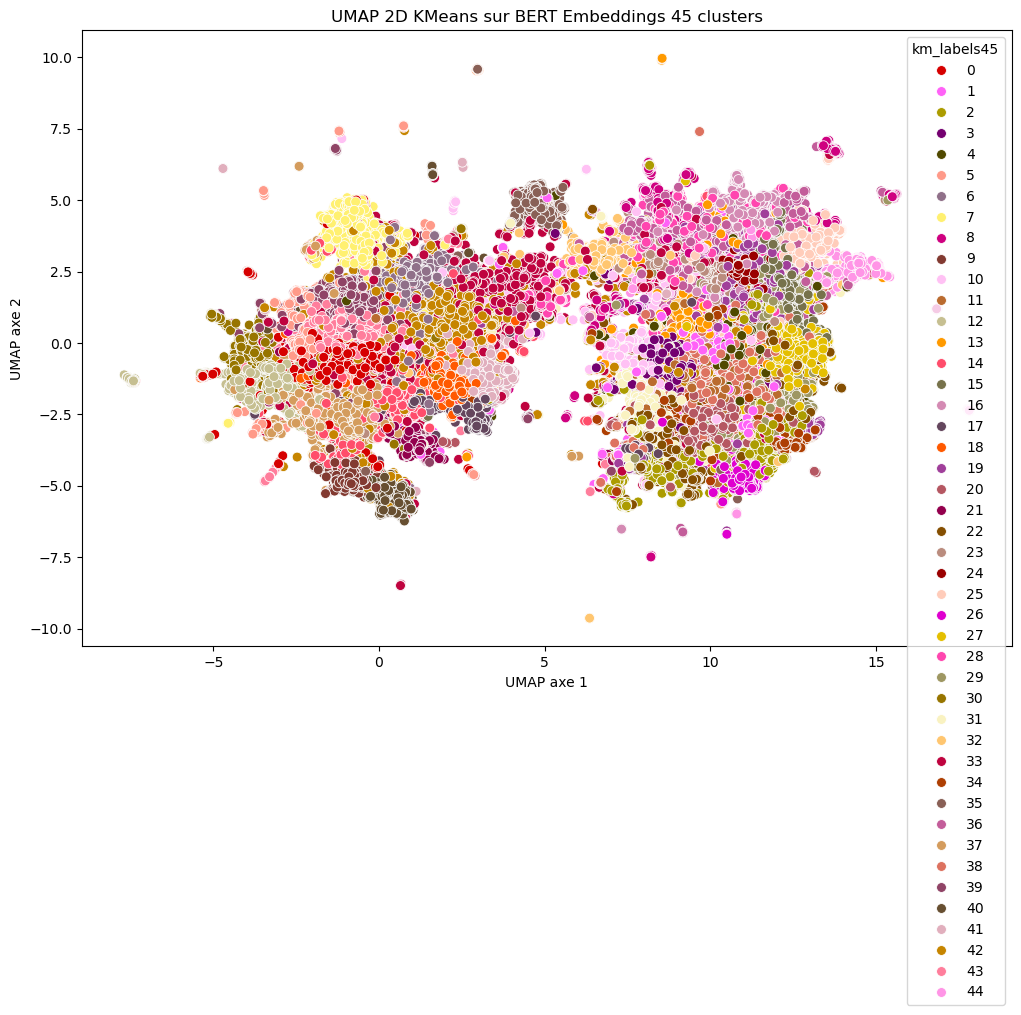

In [38]:
# 45 labels kmeans
# -----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels45'], palette=palette, s=50)
#sns.relplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels15'], palette="Spectral", s=50)

#handles, labels = scatter.get_legend_handles_labels()
#scatter.legend(handles=handles, labels=range(0,14), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adjust fontsize here

plt.title('UMAP 2D KMeans sur BERT Embeddings 45 clusters')
#plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper right', fontsize='small', title_fontsize='small')
plt.xlabel('UMAP axe 1')
#plt.xlim(-2,16)
plt.ylabel('UMAP axe 2')
#plt.ylim(4,15)
plt.show()

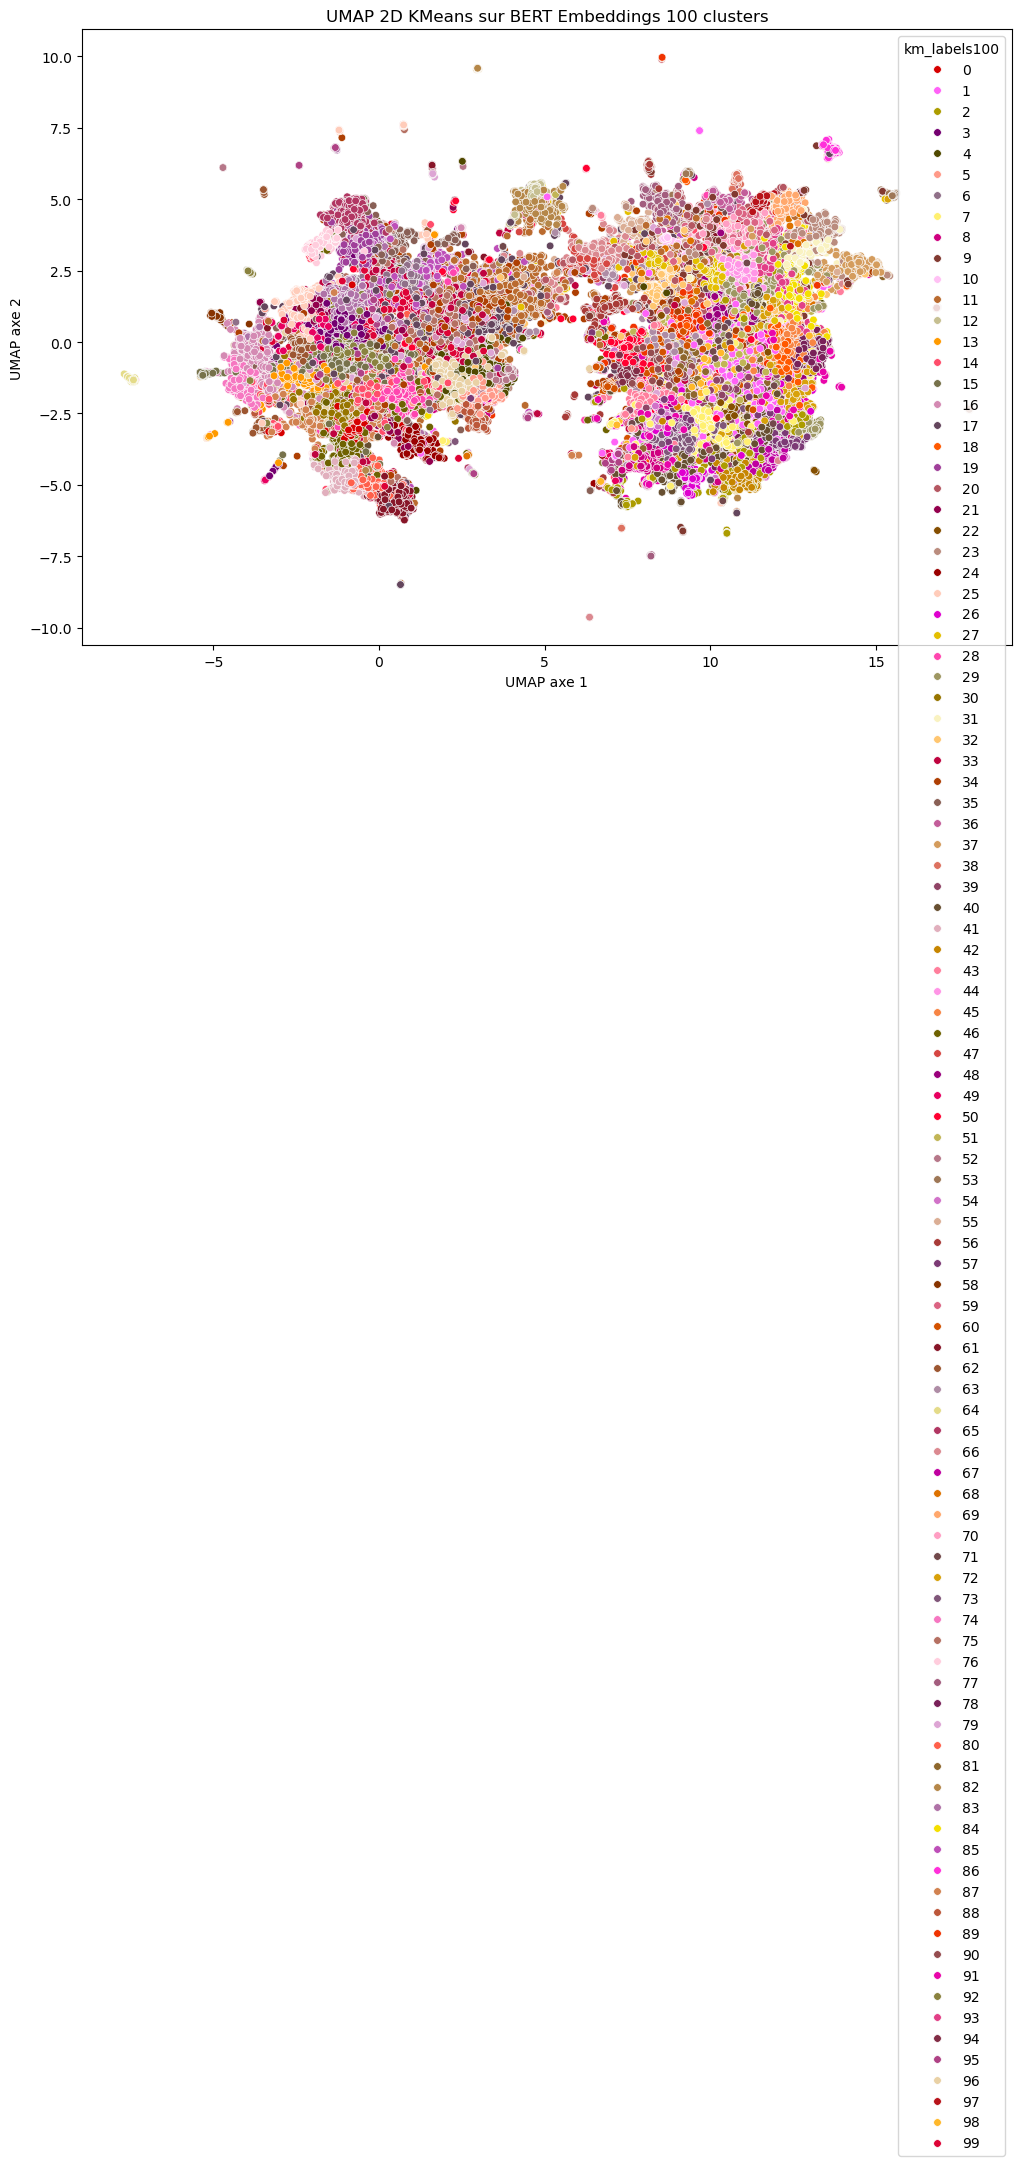

In [46]:
# 100 labels kmeans
# -----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels100'], palette=palette, s=30)
#sns.relplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['km_labels15'], palette="Spectral", s=50)

#handles, labels = scatter.get_legend_handles_labels()
#scatter.legend(handles=handles, labels=range(0,14), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adjust fontsize here

plt.title('UMAP 2D KMeans sur BERT Embeddings 100 clusters')
#plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper right', fontsize='small', title_fontsize='small')
plt.xlabel('UMAP axe 1')
#plt.xlim(-2,16)
plt.ylabel('UMAP axe 2')
#plt.ylim(4,15)
plt.show()

C:\Users\wf\AppData\Local\Temp\ipykernel_14972\2723906251.py:10: UserWarning: The palette list has more values (100) than needed (26), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_26'], palette=palette, s=50)


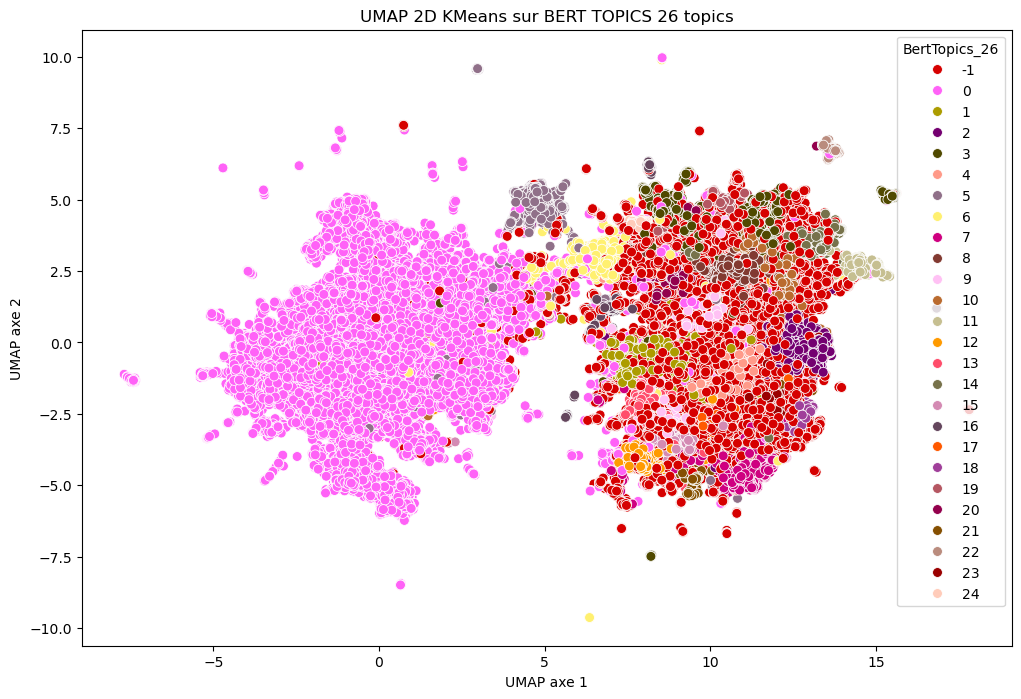

In [40]:
# 26 labels BerTTopic
# -----------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_26'], palette=palette, s=50)


plt.title('UMAP 2D KMeans sur BERT TOPICS 26 topics')
#plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper right', fontsize='small', title_fontsize='small')
plt.xlabel('UMAP axe 1')
#plt.xlim(-2,16)
plt.ylabel('UMAP axe 2')
#plt.ylim(4,15)
plt.show()

C:\Users\wf\AppData\Local\Temp\ipykernel_14972\940887399.py:8: UserWarning: The palette list has more values (100) than needed (49), which may not be intended.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_48'], palette=palette, s=50)


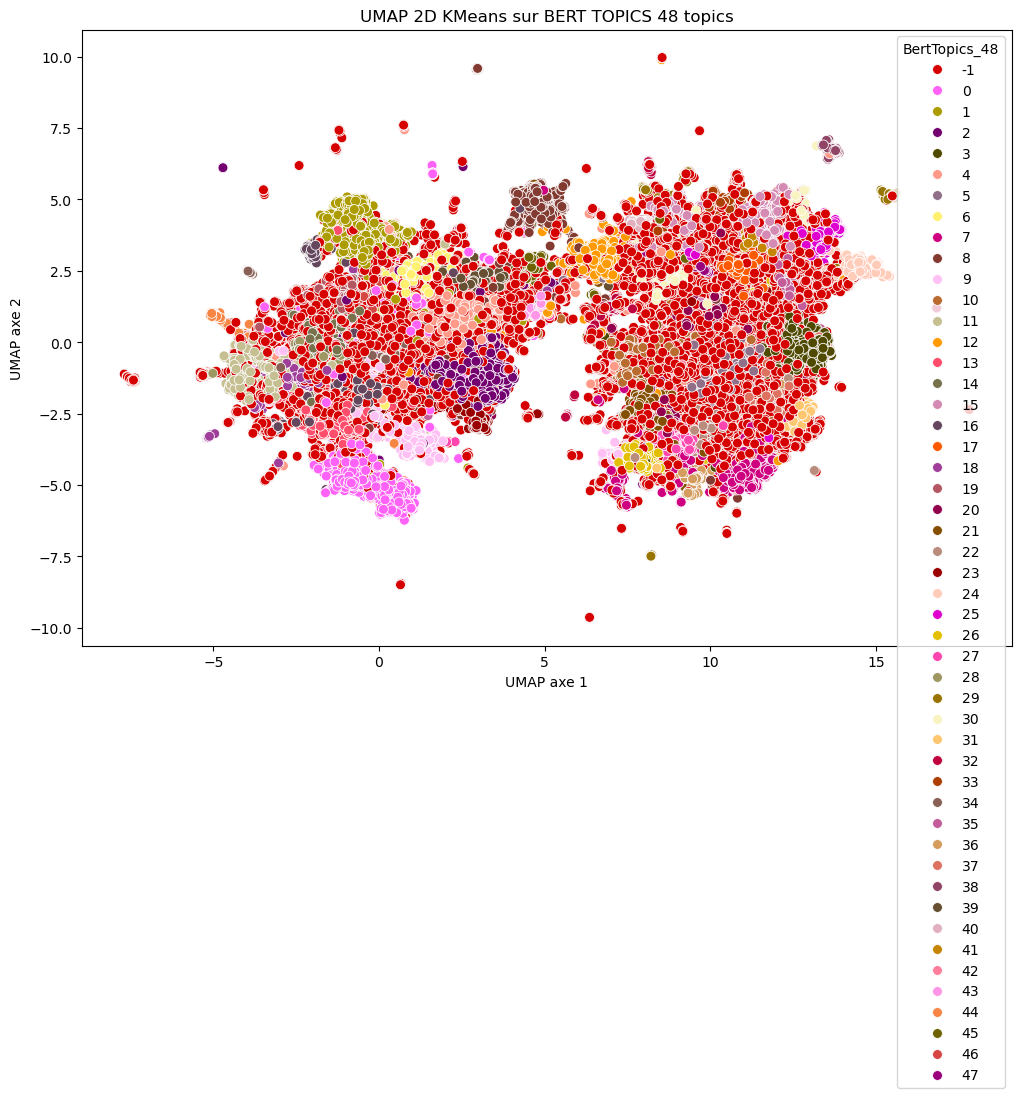

In [42]:
# 48 labels BerTTopic
# -----------------------------------------
#BertTopics_48

plt.figure(figsize=(12,8))
palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_48'], palette=palette, s=50)

plt.title('UMAP 2D KMeans sur BERT TOPICS 48 topics')
#plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper right', fontsize='small', title_fontsize='small')
plt.xlabel('UMAP axe 1')
#plt.xlim(-2,16)
plt.ylabel('UMAP axe 2')
#plt.ylim(4,15)
plt.show()

C:\Users\wf\AppData\Local\Temp\ipykernel_14972\3208569238.py:8: UserWarning: 
The palette list has fewer values (100) than needed (101) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_100'], palette=palette, s=30)


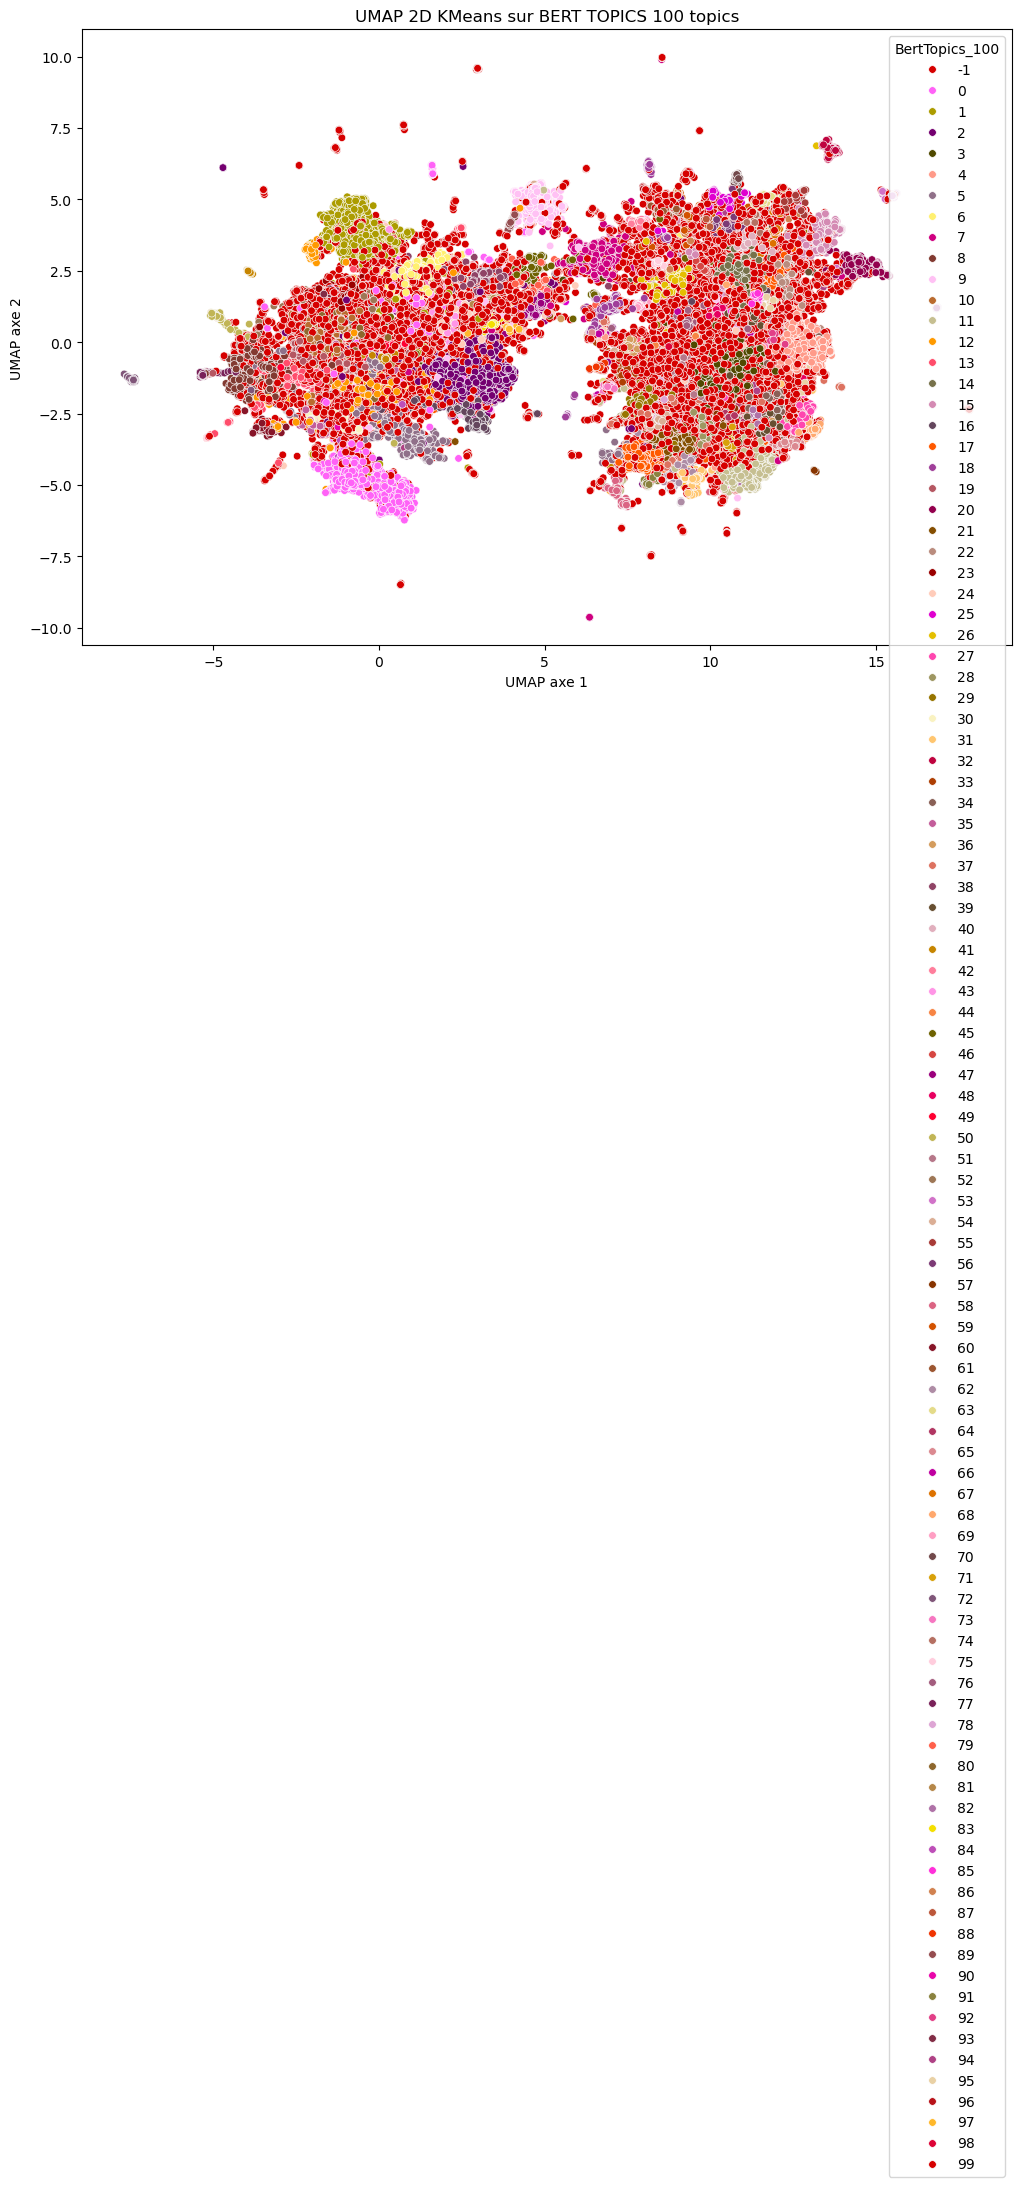

In [47]:
# 100 labels BerTTopic
# -----------------------------------------
#BertTopics_48

plt.figure(figsize=(12,8))
palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

sns.scatterplot(x=umap_embeddings_2d[:, 0], y=umap_embeddings_2d[:, 1], hue=df['BertTopics_100'], palette=palette, s=30)

plt.title('UMAP 2D KMeans sur BERT TOPICS 100 topics')
#plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper right', fontsize='small', title_fontsize='small')
plt.xlabel('UMAP axe 1')
#plt.xlim(-2,16)
plt.ylabel('UMAP axe 2')
#plt.ylim(4,15)
plt.show()

# Évaluations 2 : inter/intra classe

In [62]:
# 1. RANDOM
# --------------------------------
df9_45['random_class'] = df9_45['km_labels45'].apply(lambda x : np.random.randint(1,46))
df9_45['random_class'].value_counts()


random_class
10    1525
25    1484
8     1481
5     1481
30    1463
11    1463
15    1459
16    1456
19    1452
34    1448
42    1447
38    1447
24    1446
37    1445
6     1441
32    1437
18    1434
43    1432
28    1429
36    1426
21    1426
40    1426
13    1425
17    1424
23    1424
44    1423
12    1423
9     1420
29    1417
2     1411
41    1409
1     1406
35    1403
3     1399
45    1397
33    1392
4     1387
26    1387
7     1385
39    1382
14    1377
31    1375
22    1371
27    1370
20    1366
Name: count, dtype: int64

In [63]:
# évaluation sur random class
# ------------------------------------------

from sklearn.metrics import davies_bouldin_score

# 
dbi = davies_bouldin_score(doc_emb, df9_45['random_class'])
print("Davies-Bouldin Index (DBI):", dbi)

from sklearn.metrics import calinski_harabasz_score

# 
ch_index = calinski_harabasz_score(doc_emb, df9_45['random_class'])
print("Calinski-Harabasz Index:", ch_index)

Davies-Bouldin Index (DBI): 61.71533706611947
Calinski-Harabasz Index: 1.0113537261985084


In [43]:
# 2. BLOCS LONGUEURS
# ----------------------------------------
## le ratio non-zero (densité) diminue avec la longueur des posts
df['bloc'] = pd.cut(df['sign_count'], bins = [0,140,280,1000,3000], labels = ['50 - 140', '140 à 280','280 à 1000', '1000 à 3000'])
df['bloc'].groupby(df.bloc).count()

C:\Users\wf\AppData\Local\Temp\ipykernel_14472\1930162571.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['bloc'].groupby(df.bloc).count()


bloc
50 - 140       24335
140 à 280      10707
280 à 1000      8822
1000 à 3000    20257
Name: bloc, dtype: int64

In [44]:
# évaluation sur 4 blocs longueurs
# ------------------------------------------

# 
dbi = davies_bouldin_score(doc_emb, df['bloc'])
print("Davies-Bouldin Index (DBI):", dbi)

# 
ch_index = calinski_harabasz_score(doc_emb, df['bloc'])
print("Calinski-Harabasz Index:", ch_index)
df.bloc.value_counts()

Davies-Bouldin Index (DBI): 8.930019614450806
Calinski-Harabasz Index: 1464.3145919860988


bloc
50 - 140       24335
1000 à 3000    20257
140 à 280      10707
280 à 1000      8822
Name: count, dtype: int64

In [73]:


df9_45['short_medium'] = df9_45['sign_count'].apply(lambda x : "short" if (x < 281) else "medium")
df9_45['short_medium'].value_counts()

short_medium
short     35042
medium    29079
Name: count, dtype: int64

In [47]:
# 3. 25 KMEANS
# ----------------------------------------
# 
dbi = davies_bouldin_score(doc_emb, df['km_labels25'])
print("Davies-Bouldin Index (DBI):", dbi)


# 
ch_index = calinski_harabasz_score(doc_emb, df['km_labels25'])
print("Calinski-Harabasz Index:", ch_index)

Davies-Bouldin Index (DBI): 3.872943953774101
Calinski-Harabasz Index: 777.1144860266895


In [48]:
# 4. 30 KMEANS
# ----------------------------------------

# 
dbi = davies_bouldin_score(doc_emb, df['km_labels30'])
print("Davies-Bouldin Index (DBI):", dbi)



# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(doc_emb, df['km_labels30'])
print("Calinski-Harabasz Index:", ch_index)

Davies-Bouldin Index (DBI): 4.048990563046833
Calinski-Harabasz Index: 679.2072108965248


In [64]:
# 4. 45 KMEANS
# ----------------------------------------

# 
dbi = davies_bouldin_score(doc_emb, df9_45['km_labels45'])
print("Davies-Bouldin Index (DBI):", dbi)



# 
ch_index = calinski_harabasz_score(doc_emb, df9_45['km_labels45'])
print("Calinski-Harabasz Index:", ch_index)

Davies-Bouldin Index (DBI): 3.9530030160168392
Calinski-Harabasz Index: 502.59062641027344


In [49]:
# 4. 26 BerTopic 26
# ----------------------------------------

# 
dbi = davies_bouldin_score(doc_emb, df['BertTopics_26'])
print("Davies-Bouldin Index (DBI):", dbi)



# 
ch_index = calinski_harabasz_score(doc_emb, df['BertTopics_26'])
print("Calinski-Harabasz Index:", ch_index)

Davies-Bouldin Index (DBI): 3.792404684370046
Calinski-Harabasz Index: 393.85218733062874


In [53]:
# 4. 48 BerTopic 48
# ----------------------------------------

# 
dbi = davies_bouldin_score(df9_45['BertEmbeddings'].tolist(), df9_45['BertTopics_48'])
print("Davies-Bouldin Index (DBI):", dbi)



# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(df9_45['BertEmbeddings'].tolist(), df9_45['BertTopics_48'])
print("Calinski-Harabasz Index:", ch_index)

Davies-Bouldin Index (DBI): 3.447925876398692
Calinski-Harabasz Index: 263.6229999538049


# Estimation potentiel échantillons

In [109]:
df['bloc'].value_counts()

bloc
50 - 140       1511
1000 à 3000    1274
140 à 280       644
280 à 1000      571
Name: count, dtype: int64

In [77]:
Potential_samples45 = df9_45.groupby(['km_labels45', 'short_medium']).count()
Potential_samples45

Unnamed: 0  text  sign_count  record  id_102661  \
km_labels45 short_medium                                                    
0           medium                97    97          97      97         97   
            short               2363  2363        2363    2363       2363   
1           medium               816   816         816     816        816   
            short                441   441         441     441        441   
2           medium              1338  1338        1338    1338       1338   
...                              ...   ...         ...     ...        ...   
42          short               3306  3306        3306    3306       3306   
43          medium                74    74          74      74         74   
            short               1843  1843        1843    1843       1843   
44          medium               585   585         585     585        585   
            short                 46    46          46      46         46   

                          id_50_3000  km_labels15  km_labels20  km_labels25  \
km_labels45 short_medium                                                      
0           medium                97           97           97           97   
            short               2363         2363         2363         2363   
1           medium               816          816          816          816   
            short                441          441          441          441   
2           medium              1338         1338         1338         1338   
...                              ...          ...          ...          ...   
42          short               3306         3306         3306         3306   
43          medium                74           74           74           74   
            short               1843         1843         1843         1843   
44          medium               585          585          585          585   
            short                 46           46           46           46   

                          km_labels30  BertEmbeddings  BertTopics_26  \
km_labels45 short_medium                                               
0           medium                 97              97             97   
            short                2363            2363           2363   
1           medium                816             816            816   
            short                 441             441            441   
2           medium               1338            1338           1338   
...                               ...             ...            ...   
42          short                3306            3306           3306   
43          medium                 74              74             74   
            short                1843            1843           1843   
44          medium                585             585            585   
            short                  46              46             46   

                          BertTopics_Name  BertTopics_48  random_class  
km_labels45 short_medium                                                
0           medium                     97             97            97  
            short                    2363           2363          2363  
1           medium                    816            816           816  
            short                     441            441           441  
2           medium                   1338           1338          1338  
...                                   ...            ...           ...  
42          short                    3306           3306          3306  
43          medium                     74             74            74  
            short                    1843           1843          1843  
44          medium                    585            585           585  
            short                      46             46            46  

[90 rows x 15 columns]

In [87]:
pd.set_option('display.max_rows', 100)
Potential_samples45.columns
Potential_samples45 = Potential_samples45[['text']]
#Potential_samples30 = Potential_samples30
Potential_samples45 = Potential_samples45.astype(int)
print(Potential_samples45['text'].sum())
Potential_samples45

64121


text
km_labels45 short_medium      
0           medium          97
            short         2363
1           medium         816
            short          441
2           medium        1338
            short          167
3           medium        1371
            short          172
4           medium         996
            short          251
5           medium          17
            short         1218
6           medium          15
            short         2149
7           medium           4
            short         2647
8           medium        1193
            short           93
9           medium           4
            short         1288
10          medium        1035
            short          354
11          medium        1454
            short          307
12          medium         329
            short         1150
13          medium         638
            short          136
14          medium          62
            short         1332
15          medium         811
            short          131
16          medium        1104
            short           53
17          medium         260
            short          462
18          medium         371
            short          807
19          medium         949
            short          111
20          medium        1446
            short          193
21          medium         148
            short          734
22          medium        1211
            short          110
23          medium         545
            short          118
24          medium         674
            short           25
25          medium         772
            short           28
26          medium         697
            short           63
27          medium        1749
            short          111
28          medium         757
            short          310
29          medium         966
            short           60
30          medium         134
            short          797
31          medium         813
            short          137
32          medium         174
            short         1031
33          medium         397
            short         2040
34          medium         791
            short          110
35          medium         112
            short         1008
36          medium        1228
            short           84
37          medium          88
            short         2605
38          medium        2269
            short           75
39          medium          64
            short         1942
40          medium           9
            short         1314
41          medium         399
            short         1320
42          medium         113
            short         3306
43          medium          74
            short         1843
44          medium         585
            short           46

In [83]:
Potential_samples48 = df9_45.groupby(['BertTopics_48', 'short_medium']).count()
Potential_samples48

Unnamed: 0   text  sign_count  record  id_102661  \
BertTopics_48 short_medium                                                     
-1            medium             14324  14324       14324   14324      14324   
              short              13263  13263       13263   13263      13263   
 0            medium                10     10          10      10         10   
              short               2842   2842        2842    2842       2842   
 1            short               2673   2673        2673    2673       2673   
...                                ...    ...         ...     ...        ...   
 45           short                111    111         111     111        111   
 46           medium                10     10          10      10         10   
              short                142    142         142     142        142   
 47           medium               144    144         144     144        144   
              short                  7      7           7       7          7   

                            id_50_3000  km_labels15  km_labels20  km_labels25  \
BertTopics_48 short_medium                                                      
-1            medium             14324        14324        14324        14324   
              short              13263        13263        13263        13263   
 0            medium                10           10           10           10   
              short               2842         2842         2842         2842   
 1            short               2673         2673         2673         2673   
...                                ...          ...          ...          ...   
 45           short                111          111          111          111   
 46           medium                10           10           10           10   
              short                142          142          142          142   
 47           medium               144          144          144          144   
              short                  7            7            7            7   

                            km_labels30  km_labels45  BertEmbeddings  \
BertTopics_48 short_medium                                             
-1            medium              14324        14324           14324   
              short               13263        13263           13263   
 0            medium                 10           10              10   
              short                2842         2842            2842   
 1            short                2673         2673            2673   
...                                 ...          ...             ...   
 45           short                 111          111             111   
 46           medium                 10           10              10   
              short                 142          142             142   
 47           medium                144          144             144   
              short                   7            7               7   

                            BertTopics_26  BertTopics_Name  random_class  
BertTopics_48 short_medium                                                
-1            medium                14324            14324         14324  
              short                 13263            13263         13263  
 0            medium                   10               10            10  
              short                  2842             2842          2842  
 1            short                  2673             2673          2673  
...                                   ...              ...           ...  
 45           short                   111              111           111  
 46           medium                   10               10            10  
              short                   142              142           142  
 47           medium                  144              144           144  
              short                     7                7             7  

[96 rows x 15 column

In [88]:
Potential_samples48.columns
Potential_samples48 = Potential_samples48[['text']]
#Potential_samples30 = Potential_samples30
Potential_samples48 = Potential_samples48.astype(int)
print(Potential_samples48['text'].sum())
Potential_samples48[0:]

64121


text
BertTopics_48 short_medium       
-1            medium        14324
              short         13263
 0            medium           10
              short          2842
 1            short          2673
 2            medium          716
              short          1866
 3            medium         1534
              short           148
 4            medium           11
              short          1456
 5            medium         1302
              short           135
 6            medium            8
              short          1419
 7            medium         1228
              short           139
 8            medium          129
              short          1224
 9            medium          198
              short          1132
 10           medium         1119
              short           207
 11           medium          269
              short           975
 12           medium          108
              short          1078
 13           medium           16
              short          1140
 14           medium            4
              short          1106
 15           medium         1008
              short            87
 16           medium           35
              short           752
 17           medium          608
              short            26
 18           medium           76
              short           530
 19           short           575
 20           medium          507
              short            43
 21           medium          488
              short            56
 22           medium          497
              short            31
 23           medium          162
              short           295
 24           medium          415
              short            18
 25           medium          420
              short             6
 26           medium          381
              short            43
 27           medium          257
              short           145
 28           medium            5
              short           387
 29           medium          312
              short            13
 30           medium          303
              short            14
 31           medium          312
              short             3
 32           medium          297
              short            16
 33           medium          266
              short            12
 34           medium            5
              short           266
 35           medium          239
              short            29
 36           medium          234
              short            22
 37           medium          237
              short            19
 38           medium          240
              short             7
 39           medium           23
              short           214
 40           medium          182
              short            17
 41           medium          170
              short            21
 42           medium          173
              short            12
 43           medium           14
              short           169
 44           medium           28
              short           151
 45           medium           55
              short           111
 46           medium           10
              short           142
 47           medium          144
              short             7